{{ badge }}

<a href="https://colab.research.google.com/github/farishijazi/ai-ml-dl-course/blob/master/1_a_housing_fit.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg"></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_openml

# load house prices data (this is a special function for well known datasets)
dataset = fetch_openml('house_prices', as_frame=True)

data = dataset.data.copy()
data['SalePrice'] = dataset.target

# reduce the number of features (you can comment this line)
# data = data[["MSSubClass", "MSZoning", "LotArea", "LotConfig", "BldgType", "OverallCond", "YearBuilt", "YearRemodAdd", "Exterior1st", "BsmtFinSF2", "TotalBsmtSF", "SalePrice", ]]

X = data.drop(['SalePrice'],1) # the input features (questions)
y = data['SalePrice'] # the output feature (answer)

data.head()

The questions are the `X`s and the answers are the `y`s. The `X`s are the features of the house and the `y`s are the prices of the houses.

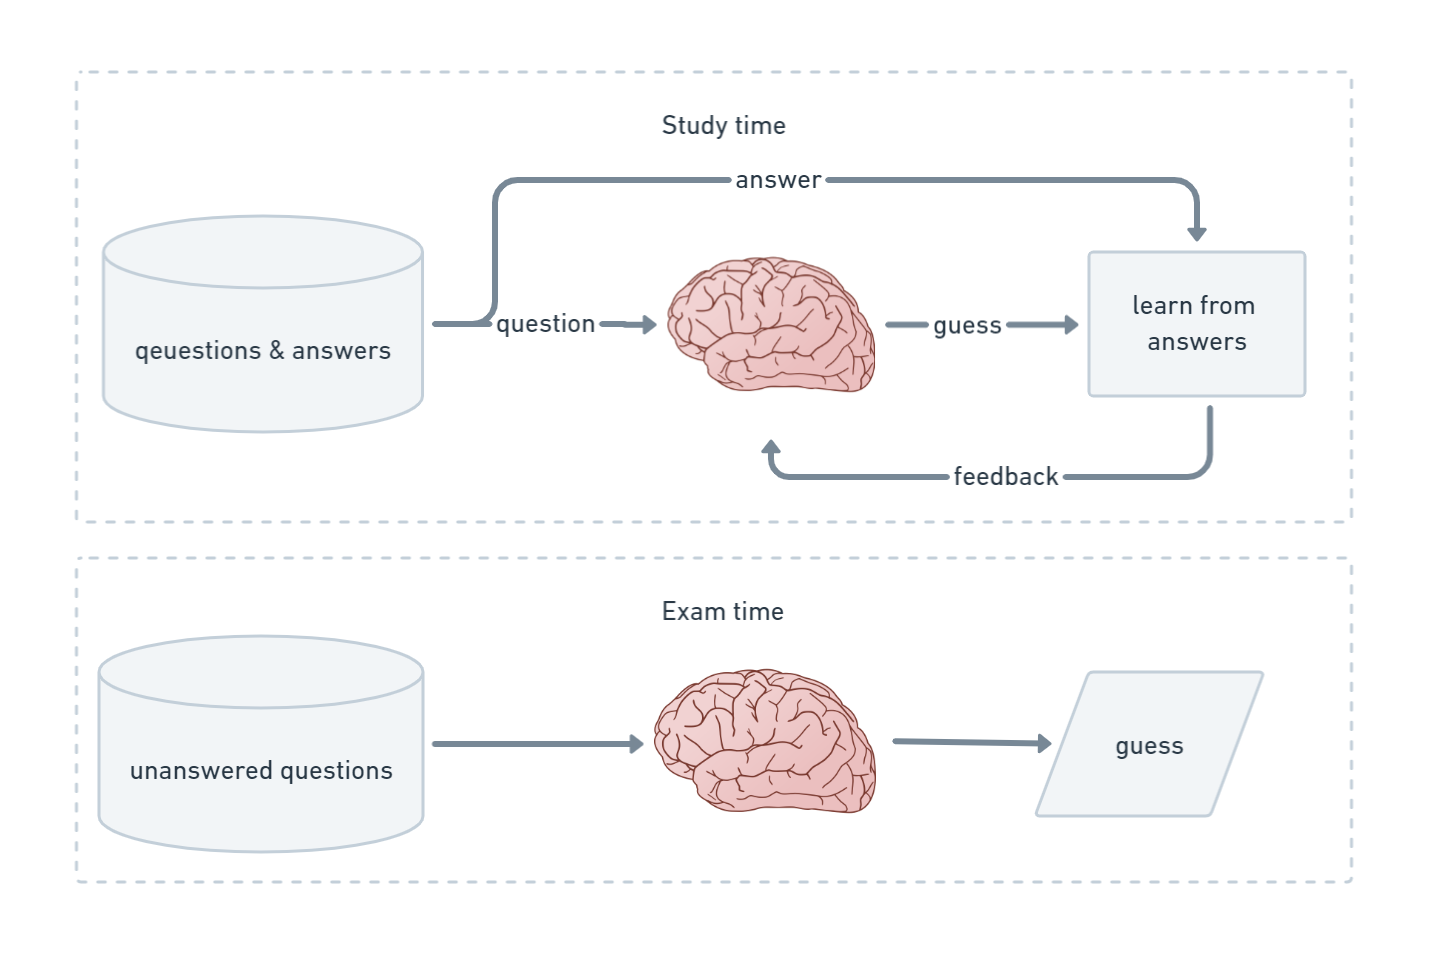

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)


Oops! that didn't work, it seems that we can't have feed strings as an input to models, it all has to be numbers

let's drop all strings for now and see how to deal with them later

In [ ]:
num_cols = [x for x in X if data[x].dtype in ['float64','int64']]
obj_cols = [x for x in X if data[x].dtype == 'object']

X = X[num_cols]

In [ ]:

model = LinearRegression()

model.fit(X, y)


`ValueError: Input contains NaN, infinity or a value too large for dtype('float64').`

Oops! NaN values are causing problems!

let's set all NaN to 0 for now and see how to deal with them later

In [ ]:
X = X.fillna(0)

In [ ]:
model = LinearRegression()

model.fit(X, y)

**Finally!** We have a model that works!

now let's see how well it does


In [ ]:
model.score(X, y)

0.8164275651873066, is this good or bad?

In [ ]:
y_pred = model.predict(X)

plt.scatter(y, y_pred, alpha=0.4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Problem

we're testing on the same data we trained on, so we're not really testing how well it generalizes, but it's a start

In [ ]:
# splitting train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# from sparse matrix to numpy array
X_train = X_train
X_test = X_test
y_train = y_train
y_test = y_test

X_train.shape, y_train.shape

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)


In [ ]:
model.score(X_test, y_test)

In [ ]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot(np.arange(0, 800000, 10000), np.arange(0, 800000, 10000))
plt.show()

In [ ]:
# import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)


y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot(np.arange(0, 800000, 10000), np.arange(0, 800000, 10000))
plt.show()


In [ ]:
## Task: complete the bellow function


def should_invest_in_house(house_features):
    """
    :param house_features: a list of features of a house
    :return: True if the house is worth investing in, False otherwise
    """
    ## TODO: your code here
    return False


## unit test:
assert should_invest_in_house([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) == False